In [1]:
import math as m
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
b = (np.mean(X*y)-np.mean(X)*np.mean(y)) / (np.mean(X**2)-np.mean(X)**2)
b

2.620538882402765

In [4]:
a = np.mean(y) - b*np.mean(X)
a

444.1773573243596

In [5]:
y_hat = 444.18 + 2.62*X
y_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

In [6]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

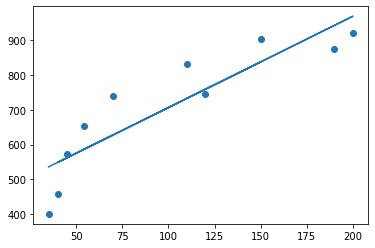

In [7]:
plt.scatter(X,y)
plt.plot(X,y_hat)
plt.show()

In [8]:
# матричный способ

In [9]:
# b_hat = ((Xтран * X)**-1) * Xтран * Y

In [10]:
X = X.reshape(10,1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [11]:
y = y.reshape(10,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [12]:
X = np.hstack([np.ones((10,1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [13]:
b_hat = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
b_hat

array([[444.17735732],
       [  2.62053888]])

In [14]:
# без интерсепта

In [15]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [16]:
b_hat = np.mean(X*y) / np.mean(X**2)
b_hat

5.889820420132688

In [17]:
y_hat = b_hat*X
y_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

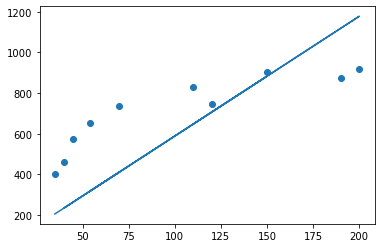

In [18]:
plt.scatter(X,y)
plt.plot(X,y_hat)
plt.show()

### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [19]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [21]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n

In [23]:
α = 1e-6
α

1e-06

In [24]:
B1 = 0.1
n=10

In [28]:
for i in range (3000):
    B1 -=α*(2/n)*np.sum((B1*X-y)*X)
    if i%500==0:
        print('Iter: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iter: 0, B1=5.636517342600247, mse=57400.798811816945
Iter: 500, B1=5.889820203079469, mse=56516.85841572004
Iter: 1000, B1=5.889820420132503, mse=56516.85841571941
Iter: 1500, B1=5.889820420132673, mse=56516.85841571943
Iter: 2000, B1=5.889820420132673, mse=56516.85841571943
Iter: 2500, B1=5.889820420132673, mse=56516.85841571943


In [29]:
# Ответ: B1=5.8898

In [30]:
y_hat = B1*X
y_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

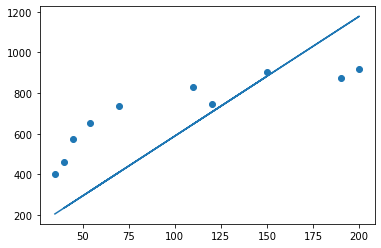

In [31]:
plt.scatter(X,y)
plt.plot(X,y_hat)
plt.show()

### Задача 3

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица критических точек распределния Стьюдента используется, если не известно значение дисперсии генеральной совокупности.
Таблица значений функции Лапласса используется, если значение дисперсии генеральной совокупности известно.